In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import numba
# Load the data
file=uproot.open("../data/VUV_eventlike.root")
print(file.keys())
print(file["Hits"].keys())

['Photons;1', 'Hits;1']
['fEvent', 'fX', 'fY', 'fZ', 'fsensor']


In [2]:
sensor=file["Hits"]["fsensor"].array()
event =file["Hits"]["fEvent"].array()
sensor=np.array(sensor,dtype=int)
event= np.array(event,dtype=int)

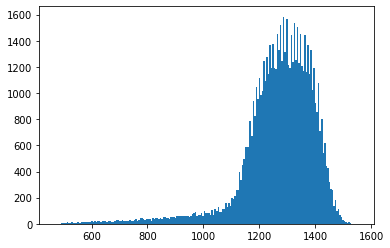

In [28]:
@numba.njit
def compute_NPE_sensor(sensor, event):
    NPE = np.zeros((len(sensor),5))
    for i in range(len(sensor)):
        NPE[event[i],sensor[i]]+=1
    return NPE

NPE=compute_NPE_sensor(sensor[:100000000], event[:100000000])

plt.hist(NPE[:70000,0], bins=200);

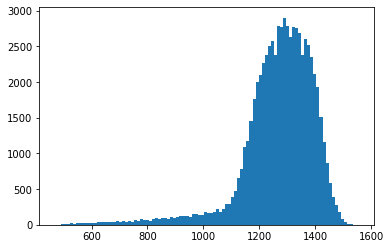

In [35]:
plt.hist(NPE[:70000,0], bins=100);
# plt.semilogy()